In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Exploratory Data Analysis (EDA) for Target-Specific Splits

This notebook performs comprehensive EDA on a specific target's train/val/test splits.

In [9]:
# ========================================
# CONFIGURATION: Select target to analyze
# ========================================

# Available targets:
# - "yield_strength_MPa"
# - "uts_MPa"
# - "elongation_pct"
# - "reduction_area_pct"
# - "charpy_temp_C"
# - "charpy_toughness_J"

TARGET_NAME = "yield_strength_MPa"  # <-- CHANGE THIS

print("=" * 70)
print(f"LOADING DATA FOR TARGET: {TARGET_NAME}")
print("=" * 70)

# Define data directory
SPLITS_DIR = Path("../../data/data_splits")
target_dir = SPLITS_DIR / TARGET_NAME

# Check if directory exists
if not target_dir.exists():
    raise FileNotFoundError(f"Target directory not found: {target_dir}")

# Load data
print(f"\n Loading from: {target_dir}")
X_train = pd.read_csv(target_dir / "X_train_clean.csv")
y_train = pd.read_csv(target_dir / "y_train.csv")
X_val = pd.read_csv(target_dir / "X_val_clean.csv")
y_val = pd.read_csv(target_dir / "y_val.csv")
X_test = pd.read_csv(target_dir / "X_test_clean.csv")
y_test = pd.read_csv(target_dir / "y_test.csv")

print("\n Data loaded successfully!")
print(f"\nDataset shapes:")
print(f"  Train: X={X_train.shape}, y={y_train.shape}")
print(f"  Val:   X={X_val.shape}, y={y_val.shape}")
print(f"  Test:  X={X_test.shape}, y={y_test.shape}")

LOADING DATA FOR TARGET: yield_strength_MPa

 Loading from: ..\..\data\data_splits\yield_strength_MPa

 Data loaded successfully!

Dataset shapes:
  Train: X=(1340, 35), y=(1340, 1)
  Val:   X=(156, 35), y=(156, 1)
  Test:  X=(156, 35), y=(156, 1)


In [10]:
# Dataset overview
print("=" * 70)
print("DATASET OVERVIEW")
print("=" * 70)

# Check for labeled vs unlabeled in training set
labeled_mask = y_train[TARGET_NAME].notna()
n_labeled = labeled_mask.sum()
n_unlabeled = (~labeled_mask).sum()

print(f"\n Training Set Composition:")
print(f"  Total samples:     {len(X_train):,}")
print(f"  Labeled:           {n_labeled:,} ({n_labeled/len(X_train)*100:.1f}%)")
print(f"  Unlabeled:         {n_unlabeled:,} ({n_unlabeled/len(X_train)*100:.1f}%)")

print(f"\n Validation Set:")
print(f"  Total samples:     {len(X_val):,}")
print(f"  Missing values:    {y_val[TARGET_NAME].isna().sum()}")

print(f"\n Test Set:")
print(f"  Total samples:     {len(X_test):,}")
print(f"  Missing values:    {y_test[TARGET_NAME].isna().sum()}")

print(f"\n Features:")
print(f"  Number of features: {X_train.shape[1]}")
print(f"  Feature names: {list(X_train.columns[:10])}... ({X_train.shape[1] - 10} more)")

print(f"\n Target Variable: {TARGET_NAME}")
print(f"  Data type: {y_train[TARGET_NAME].dtype}")

# Get labeled training data for statistics
y_train_labeled = y_train[labeled_mask][TARGET_NAME]
print(f"\n  Statistics (labeled training data):")
print(f"    Mean:   {y_train_labeled.mean():.2f}")
print(f"    Std:    {y_train_labeled.std():.2f}")
print(f"    Min:    {y_train_labeled.min():.2f}")
print(f"    25%:    {y_train_labeled.quantile(0.25):.2f}")
print(f"    Median: {y_train_labeled.median():.2f}")
print(f"    75%:    {y_train_labeled.quantile(0.75):.2f}")
print(f"    Max:    {y_train_labeled.max():.2f}")

print("=" * 70)

DATASET OVERVIEW

 Training Set Composition:
  Total samples:     1,340
  Labeled:           468 (34.9%)
  Unlabeled:         872 (65.1%)

 Validation Set:
  Total samples:     156
  Missing values:    0

 Test Set:
  Total samples:     156
  Missing values:    0

 Features:
  Number of features: 35
  Feature names: ['carbon_wt_pct', 'silicon_wt_pct', 'manganese_wt_pct', 'sulfur_wt_pct', 'phosphorus_wt_pct', 'nickel_wt_pct', 'chromium_wt_pct', 'molybdenum_wt_pct', 'vanadium_wt_pct', 'copper_wt_pct']... (25 more)

 Target Variable: yield_strength_MPa
  Data type: float64

  Statistics (labeled training data):
    Mean:   507.79
    Std:    93.10
    Min:    315.00
    25%:    443.00
    Median: 494.00
    75%:    554.25
    Max:    920.00


## 1. Target Distribution Analysis

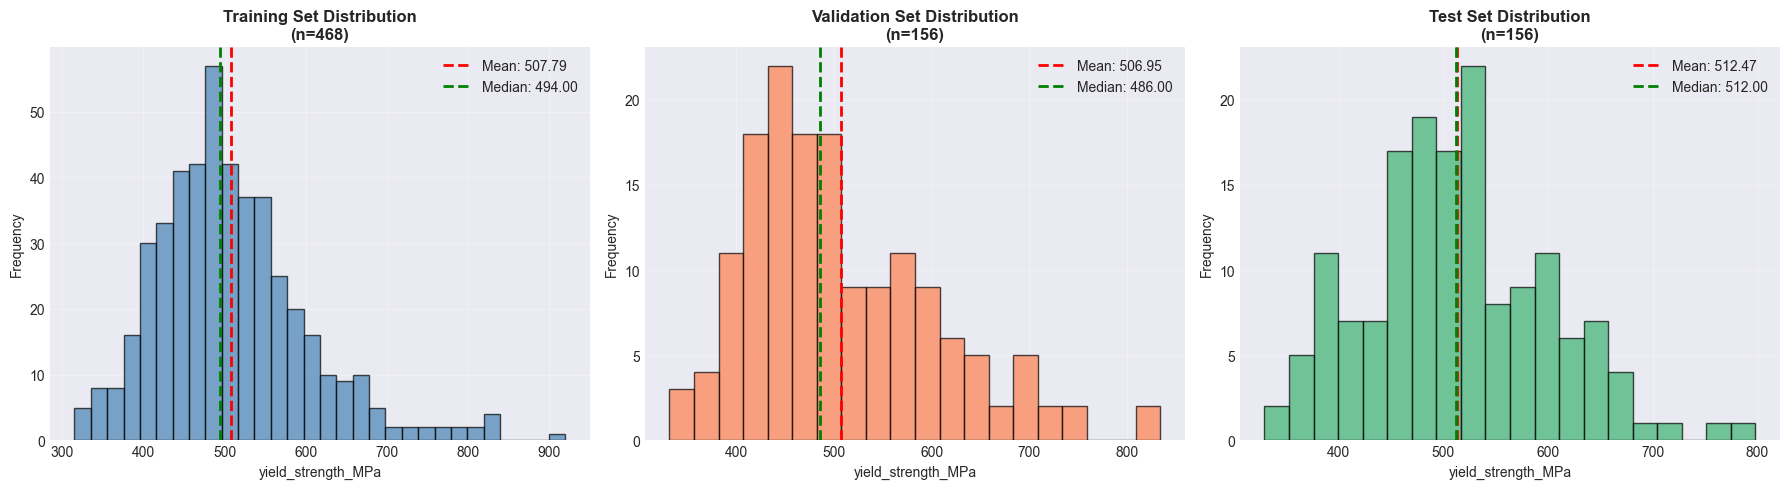

In [11]:
# Target distribution across splits
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Training (labeled only)
y_train_labeled = y_train[y_train[TARGET_NAME].notna()][TARGET_NAME]
axes[0].hist(y_train_labeled, bins=30, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].axvline(y_train_labeled.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {y_train_labeled.mean():.2f}')
axes[0].axvline(y_train_labeled.median(), color='green', linestyle='--', linewidth=2, label=f'Median: {y_train_labeled.median():.2f}')
axes[0].set_title(f'Training Set Distribution\n(n={len(y_train_labeled)})', fontsize=12, fontweight='bold')
axes[0].set_xlabel(TARGET_NAME, fontsize=10)
axes[0].set_ylabel('Frequency', fontsize=10)
axes[0].legend()
axes[0].grid(alpha=0.3)

# Validation
axes[1].hist(y_val[TARGET_NAME], bins=20, edgecolor='black', alpha=0.7, color='coral')
axes[1].axvline(y_val[TARGET_NAME].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {y_val[TARGET_NAME].mean():.2f}')
axes[1].axvline(y_val[TARGET_NAME].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {y_val[TARGET_NAME].median():.2f}')
axes[1].set_title(f'Validation Set Distribution\n(n={len(y_val)})', fontsize=12, fontweight='bold')
axes[1].set_xlabel(TARGET_NAME, fontsize=10)
axes[1].set_ylabel('Frequency', fontsize=10)
axes[1].legend()
axes[1].grid(alpha=0.3)

# Test
axes[2].hist(y_test[TARGET_NAME], bins=20, edgecolor='black', alpha=0.7, color='mediumseagreen')
axes[2].axvline(y_test[TARGET_NAME].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {y_test[TARGET_NAME].mean():.2f}')
axes[2].axvline(y_test[TARGET_NAME].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {y_test[TARGET_NAME].median():.2f}')
axes[2].set_title(f'Test Set Distribution\n(n={len(y_test)})', fontsize=12, fontweight='bold')
axes[2].set_xlabel(TARGET_NAME, fontsize=10)
axes[2].set_ylabel('Frequency', fontsize=10)
axes[2].legend()
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

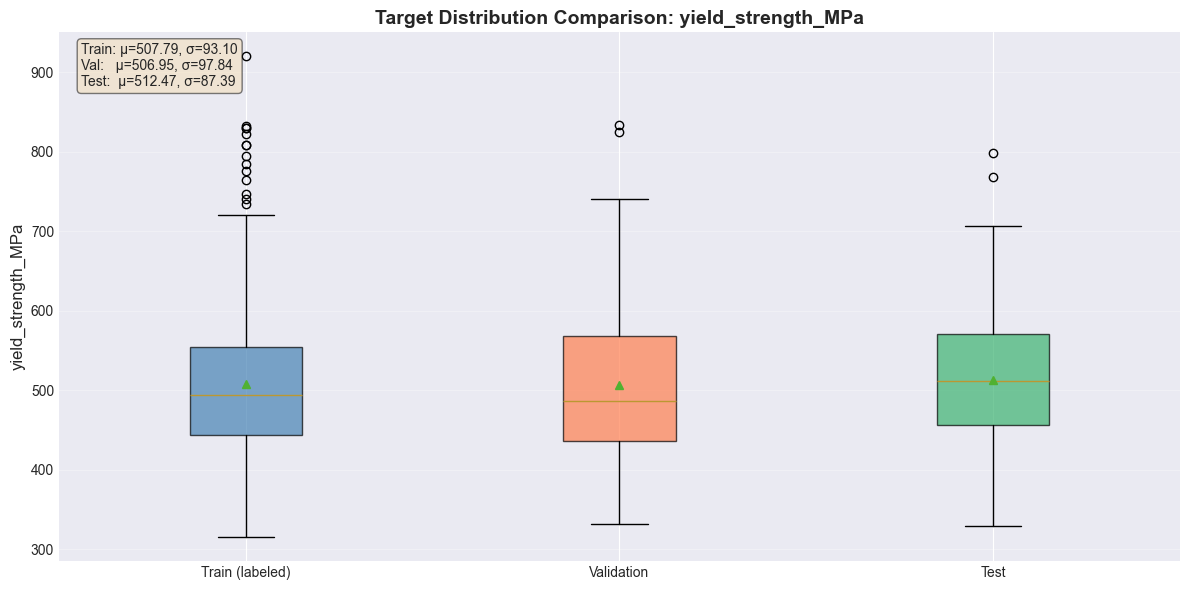

In [12]:
# Box plots for target comparison across splits
fig, ax = plt.subplots(figsize=(12, 6))

data_to_plot = [
    y_train_labeled.values,
    y_val[TARGET_NAME].values,
    y_test[TARGET_NAME].values
]

bp = ax.boxplot(data_to_plot, labels=['Train (labeled)', 'Validation', 'Test'],
                patch_artist=True, showmeans=True)

# Color the boxes
colors = ['steelblue', 'coral', 'mediumseagreen']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax.set_ylabel(TARGET_NAME, fontsize=12)
ax.set_title(f'Target Distribution Comparison: {TARGET_NAME}', fontsize=14, fontweight='bold')
ax.grid(alpha=0.3, axis='y')

# Add statistics table
stats_text = f"Train: μ={y_train_labeled.mean():.2f}, σ={y_train_labeled.std():.2f}\n"
stats_text += f"Val:   μ={y_val[TARGET_NAME].mean():.2f}, σ={y_val[TARGET_NAME].std():.2f}\n"
stats_text += f"Test:  μ={y_test[TARGET_NAME].mean():.2f}, σ={y_test[TARGET_NAME].std():.2f}"
ax.text(0.02, 0.98, stats_text, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

## 2. Feature Analysis

In [13]:
# Missing values analysis
print("=" * 70)
print("MISSING VALUES ANALYSIS")
print("=" * 70)

missing_train = X_train.isnull().sum()
missing_train_pct = (missing_train / len(X_train)) * 100

missing_features = missing_train[missing_train > 0].sort_values(ascending=False)

if len(missing_features) > 0:
print(f'
[!] Features with missing values in training set:')
    for feat, count in missing_features.items():
        pct = (count / len(X_train)) * 100
        print(f"  {feat:<30s}: {count:>5d} ({pct:>5.1f}%)")
else:
    print("\n No missing values found in features!")

print("\n" + "=" * 70)

MISSING VALUES ANALYSIS

 No missing values found in features!



<>:12: SyntaxWarning: invalid escape sequence '\ '
<>:12: SyntaxWarning: invalid escape sequence '\ '
C:\Users\Ouissal\AppData\Local\Temp\ipykernel_5600\3719482629.py:12: SyntaxWarning: invalid escape sequence '\ '
print(f'
[!] Features with missing values in training set:')


Plotting distributions for 35 numeric features...


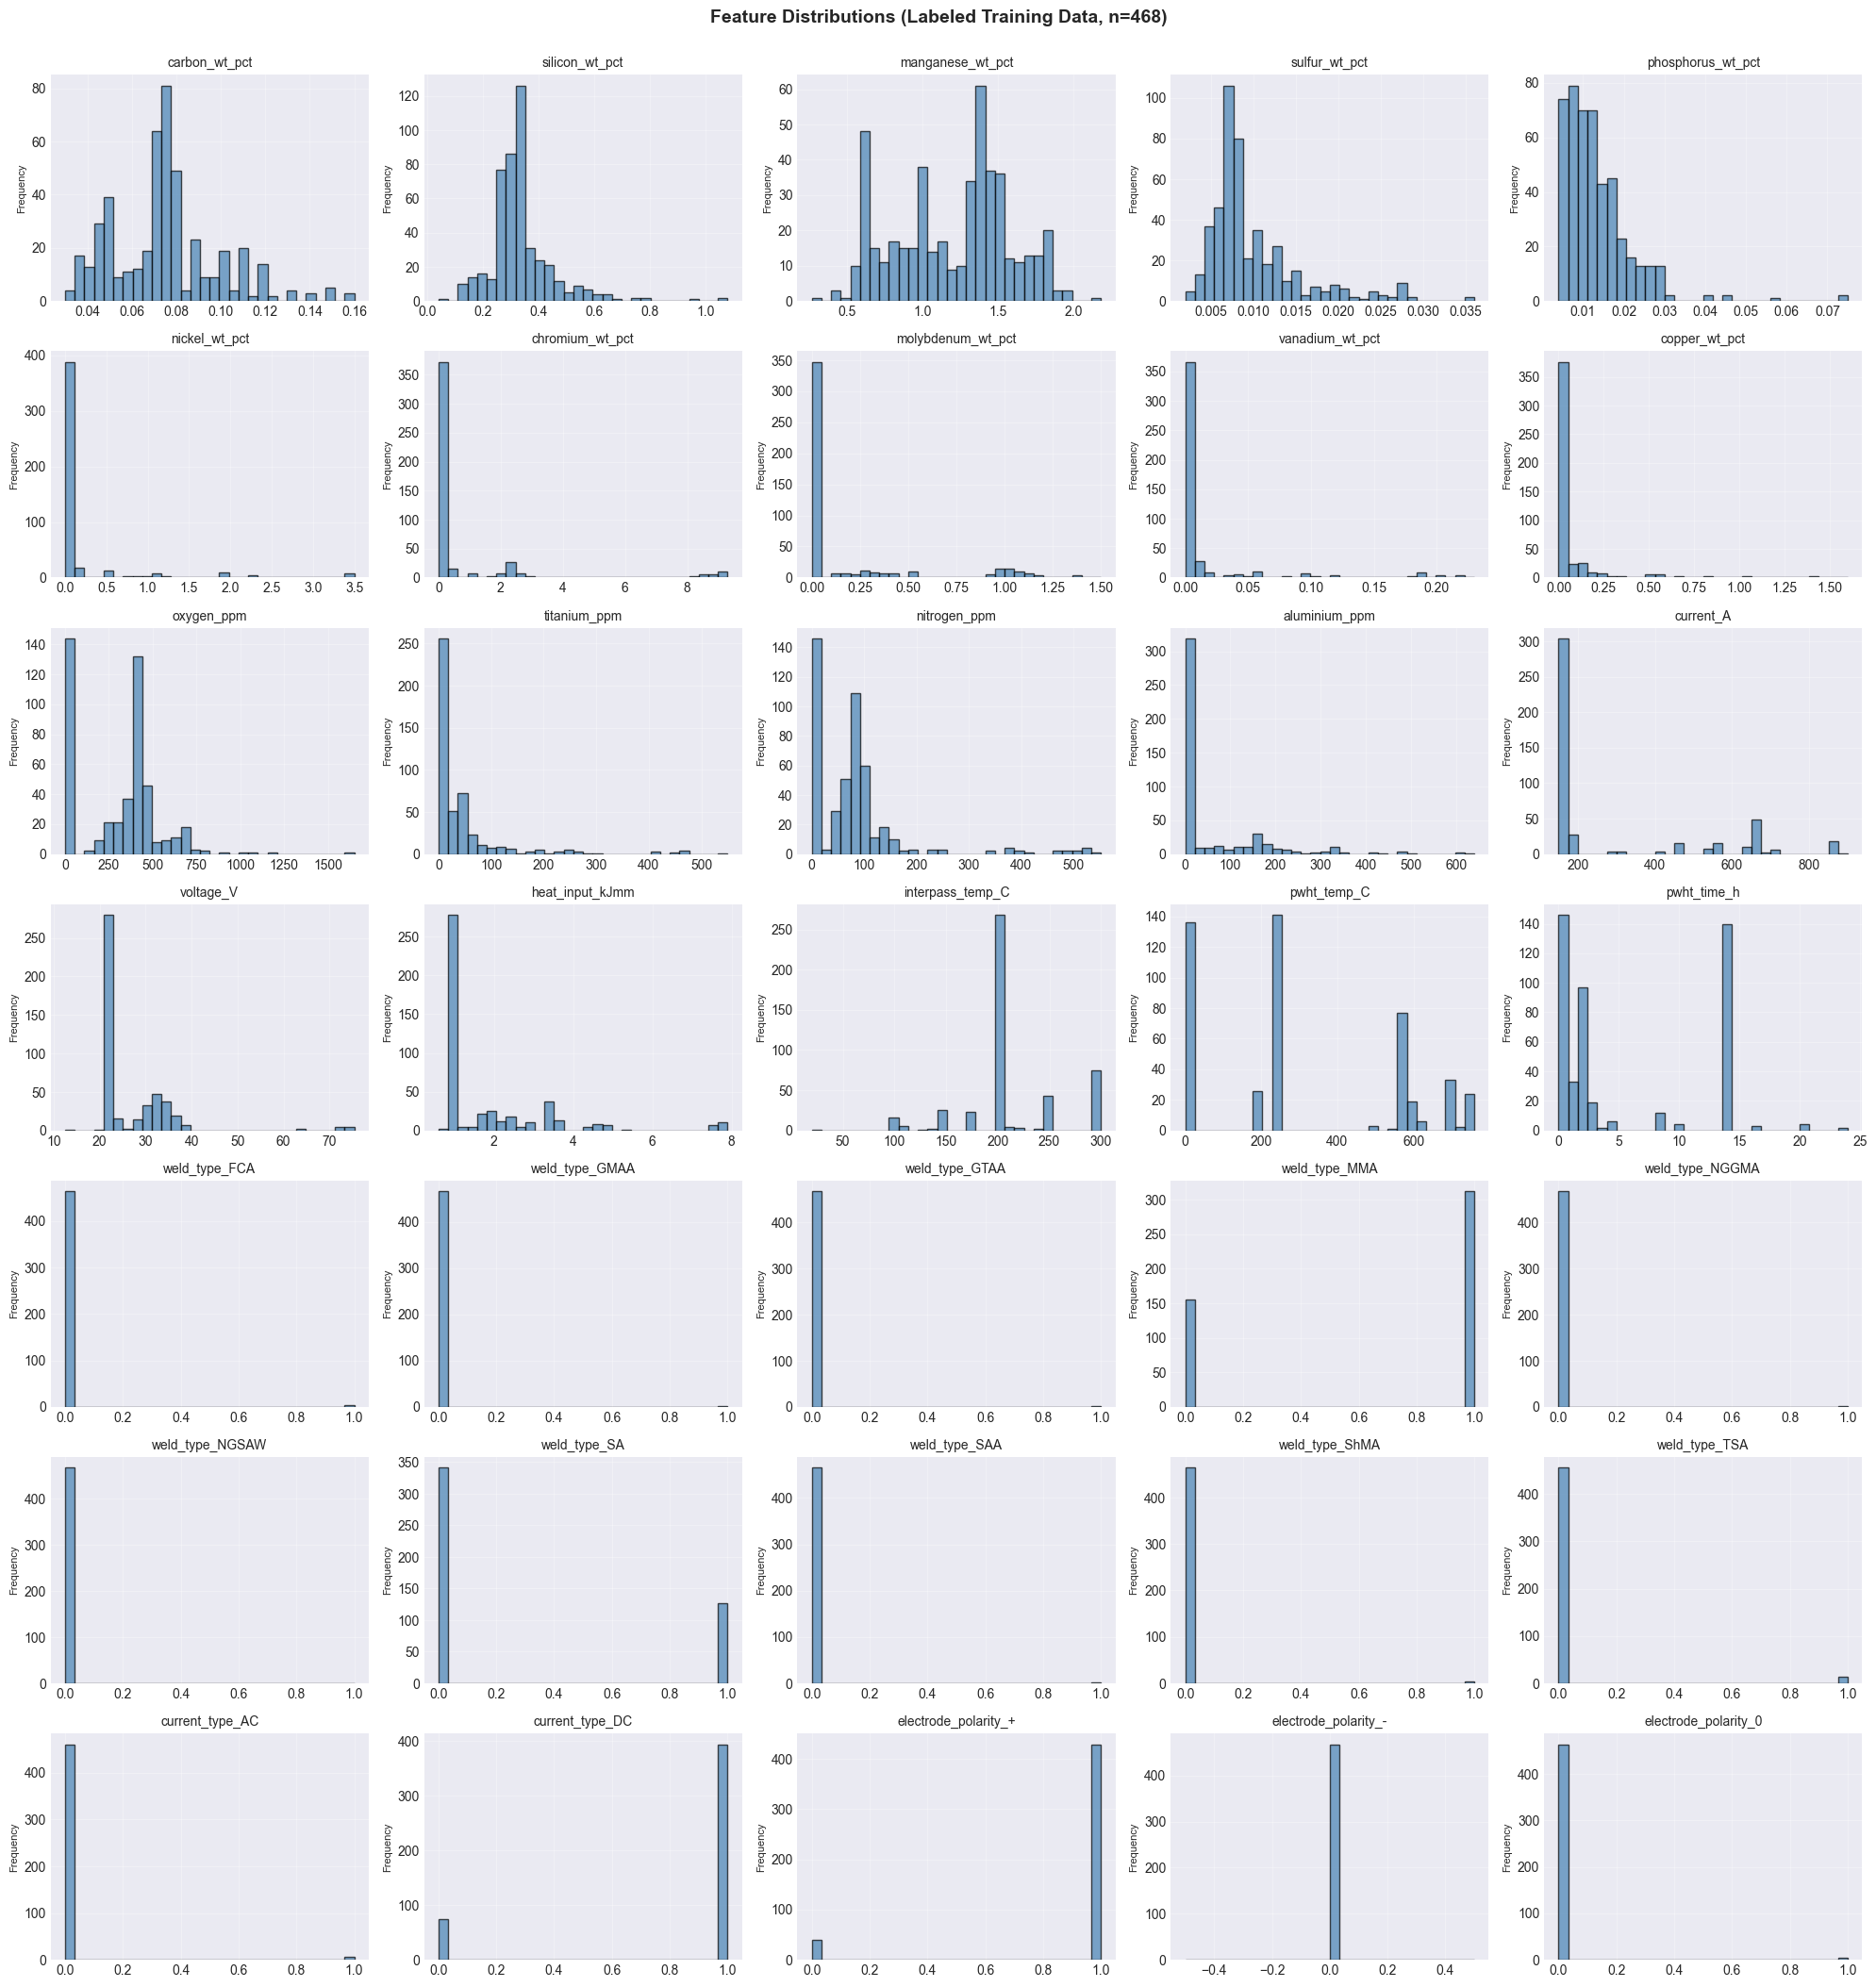

In [14]:
# Feature distributions (labeled training data only)
X_train_labeled = X_train[y_train[TARGET_NAME].notna()]

# Select numeric features
numeric_features = X_train_labeled.select_dtypes(include=[np.number]).columns.tolist()

print(f"Plotting distributions for {len(numeric_features)} numeric features...")

# Calculate grid size
n_features = len(numeric_features)
n_cols = 5
n_rows = int(np.ceil(n_features / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 3))
axes = axes.flatten() if n_features > 1 else [axes]

for i, feature in enumerate(numeric_features):
    if i < len(axes):
        axes[i].hist(X_train_labeled[feature], bins=30, edgecolor='black', alpha=0.7, color='steelblue')
        axes[i].set_title(feature, fontsize=10)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('Frequency', fontsize=8)
        axes[i].grid(alpha=0.3)

# Hide unused subplots
for i in range(n_features, len(axes)):
    axes[i].set_visible(False)

plt.suptitle(f'Feature Distributions (Labeled Training Data, n={len(X_train_labeled)})', 
             fontsize=14, fontweight='bold', y=1.001)
plt.tight_layout()
plt.show()

## 3. Correlation Analysis

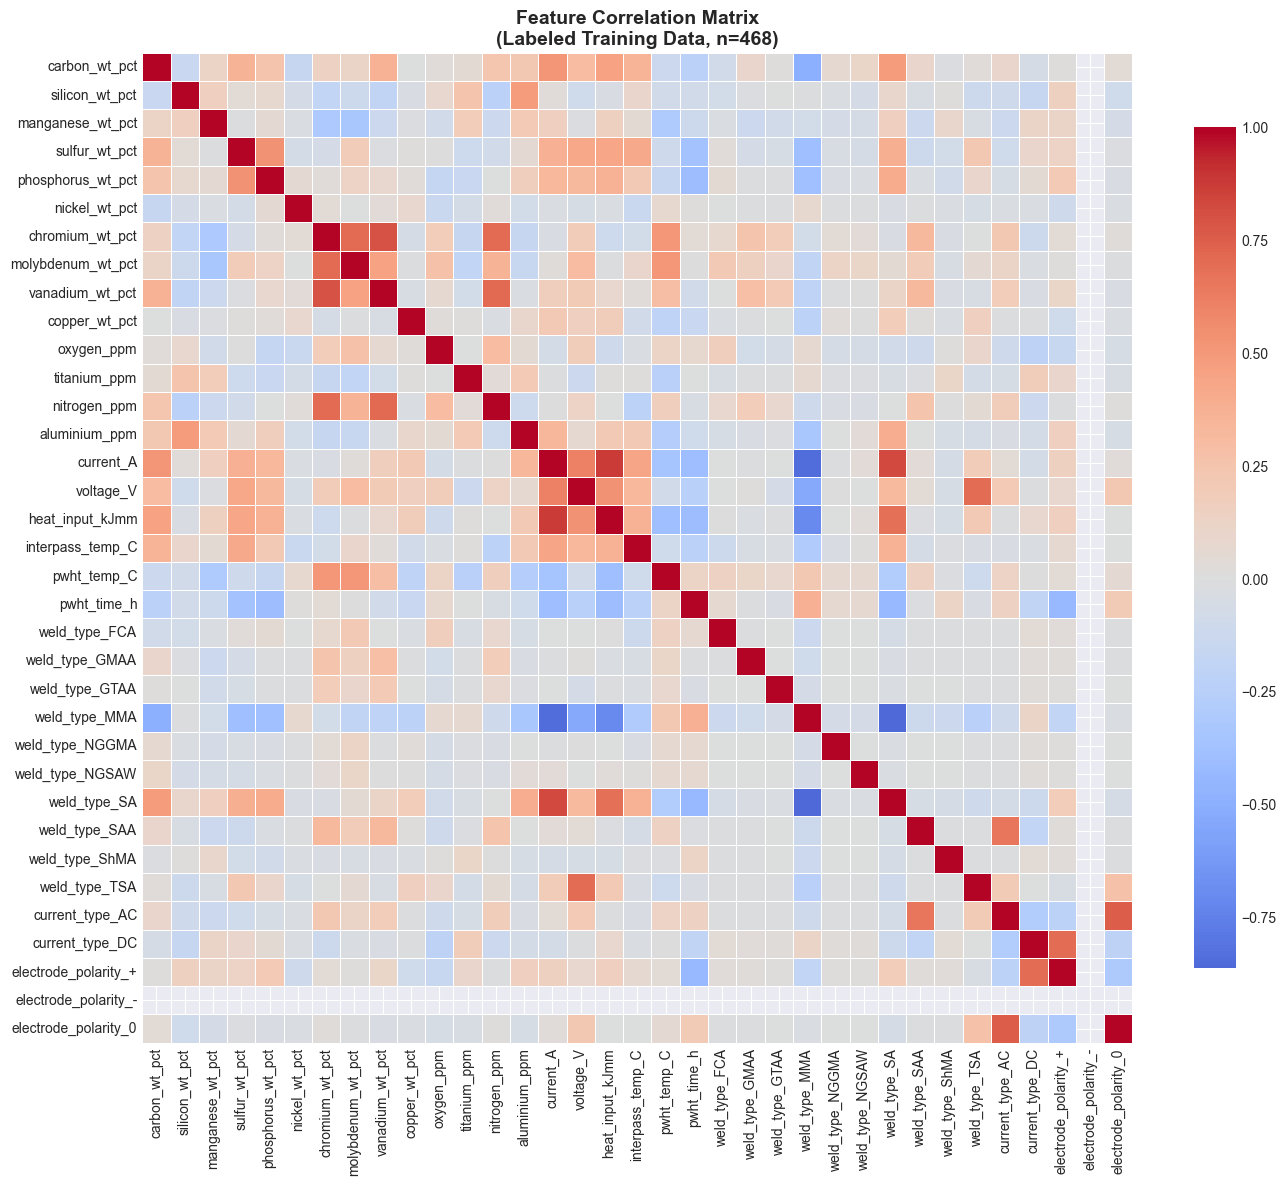

In [15]:
# Feature correlation heatmap
plt.figure(figsize=(14, 12))
corr_matrix = X_train_labeled.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=False, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title(f'Feature Correlation Matrix\n(Labeled Training Data, n={len(X_train_labeled)})', 
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

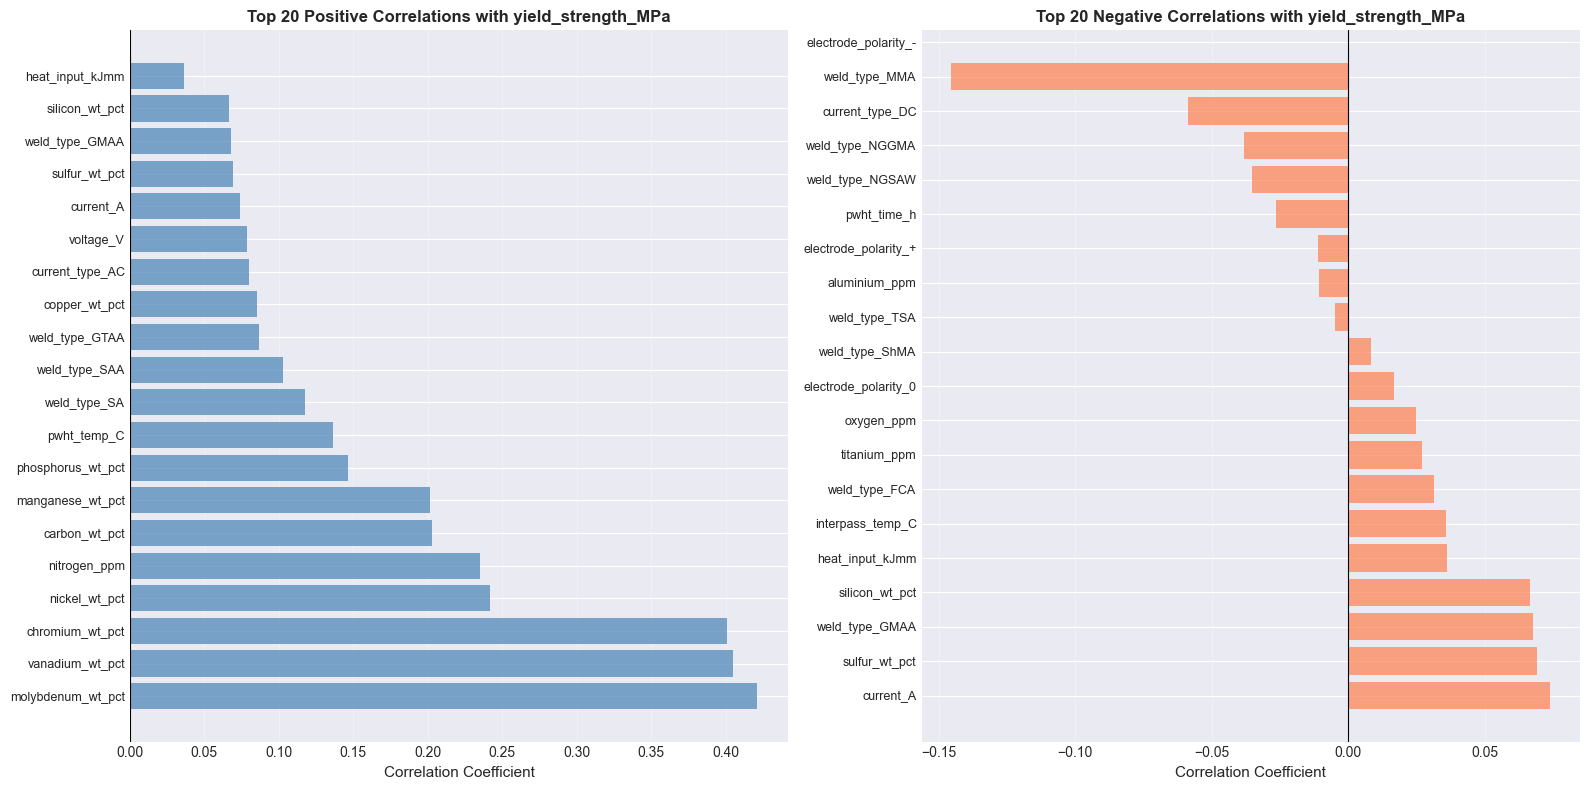


Top 10 features most correlated with yield_strength_MPa:
molybdenum_wt_pct    0.420967
vanadium_wt_pct      0.405099
chromium_wt_pct      0.400789
nickel_wt_pct        0.241594
nitrogen_ppm         0.235104
carbon_wt_pct        0.203000
manganese_wt_pct     0.201257
phosphorus_wt_pct    0.146551
pwht_temp_C          0.136134
weld_type_SA         0.117819
Name: yield_strength_MPa, dtype: float64


In [16]:
# Feature-Target correlations
# Combine features with target for labeled data
combined_labeled = X_train_labeled.copy()
combined_labeled[TARGET_NAME] = y_train_labeled.values

# Calculate correlations with target
target_corr = combined_labeled.corr()[TARGET_NAME].drop(TARGET_NAME).sort_values(ascending=False)

# Plot top correlations
n_top = min(20, len(target_corr))
top_corr = target_corr.head(n_top)
bottom_corr = target_corr.tail(n_top)

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Positive correlations
axes[0].barh(range(len(top_corr)), top_corr.values, color='steelblue', alpha=0.7)
axes[0].set_yticks(range(len(top_corr)))
axes[0].set_yticklabels(top_corr.index, fontsize=9)
axes[0].set_xlabel('Correlation Coefficient', fontsize=11)
axes[0].set_title(f'Top {n_top} Positive Correlations with {TARGET_NAME}', fontsize=12, fontweight='bold')
axes[0].axvline(0, color='black', linewidth=0.8)
axes[0].grid(alpha=0.3, axis='x')

# Negative correlations
axes[1].barh(range(len(bottom_corr)), bottom_corr.values, color='coral', alpha=0.7)
axes[1].set_yticks(range(len(bottom_corr)))
axes[1].set_yticklabels(bottom_corr.index, fontsize=9)
axes[1].set_xlabel('Correlation Coefficient', fontsize=11)
axes[1].set_title(f'Top {n_top} Negative Correlations with {TARGET_NAME}', fontsize=12, fontweight='bold')
axes[1].axvline(0, color='black', linewidth=0.8)
axes[1].grid(alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

print(f"\nTop 10 features most correlated with {TARGET_NAME}:")
print(target_corr.head(10))

In [ ]:
## 4. Feature-Target Relationships (Scatter Plots)

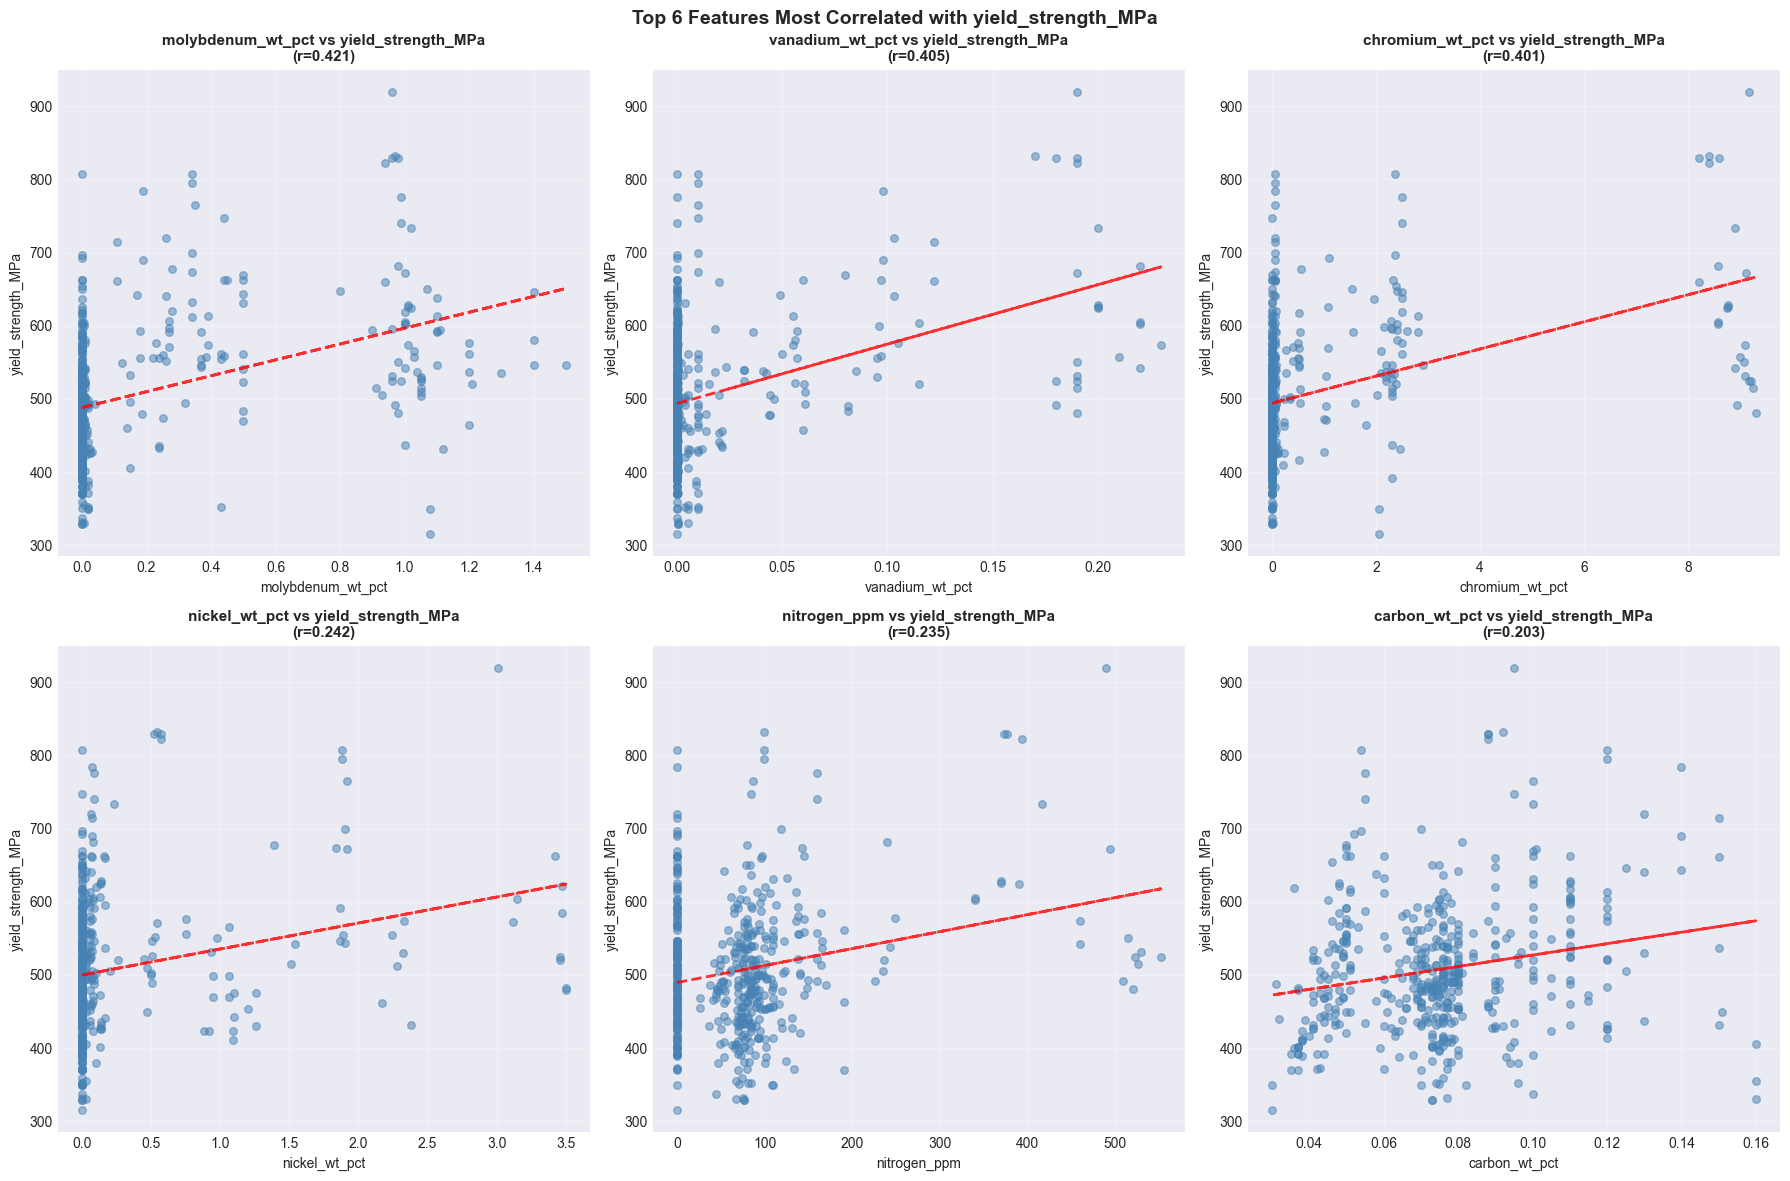

In [17]:
# Scatter plots for top correlated features
top_features = target_corr.abs().sort_values(ascending=False).head(6).index.tolist()

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, feature in enumerate(top_features):
    axes[i].scatter(X_train_labeled[feature], y_train_labeled, alpha=0.5, s=30, color='steelblue')
    axes[i].set_xlabel(feature, fontsize=10)
    axes[i].set_ylabel(TARGET_NAME, fontsize=10)
    axes[i].set_title(f'{feature} vs {TARGET_NAME}\n(r={target_corr[feature]:.3f})', 
                     fontsize=11, fontweight='bold')
    axes[i].grid(alpha=0.3)
    
    # Add trend line
    z = np.polyfit(X_train_labeled[feature].fillna(0), y_train_labeled, 1)
    p = np.poly1d(z)
    axes[i].plot(X_train_labeled[feature], p(X_train_labeled[feature]), "r--", alpha=0.8, linewidth=2)

plt.suptitle(f'Top 6 Features Most Correlated with {TARGET_NAME}', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 5. Data Quality Summary

In [18]:
print("=" * 70)
print("DATA QUALITY SUMMARY")
print("=" * 70)

# Features
print(f"\n Features ({X_train.shape[1]} total):")
print(f"  Numeric features:     {len(X_train.select_dtypes(include=[np.number]).columns)}")
print(f"  Categorical features: {len(X_train.select_dtypes(exclude=[np.number]).columns)}")
print(f"  Missing values:       {X_train.isnull().sum().sum()}")

# Target
print(f"\n Target: {TARGET_NAME}")
print(f"  Training labeled:     {n_labeled:,} samples")
print(f"  Training unlabeled:   {n_unlabeled:,} samples")
print(f"  Validation:           {len(y_val):,} samples (no missing)")
print(f"  Test:                 {len(y_test):,} samples (no missing)")

# Distribution comparison
print(f"\n Distribution Statistics:")
print(f"  Train mean:  {y_train_labeled.mean():.2f}  |  Val mean:  {y_val[TARGET_NAME].mean():.2f}  |  Test mean:  {y_test[TARGET_NAME].mean():.2f}")
print(f"  Train std:   {y_train_labeled.std():.2f}  |  Val std:   {y_val[TARGET_NAME].std():.2f}  |  Test std:   {y_test[TARGET_NAME].std():.2f}")
print(f"  Train range: [{y_train_labeled.min():.2f}, {y_train_labeled.max():.2f}]")
print(f"  Val range:   [{y_val[TARGET_NAME].min():.2f}, {y_val[TARGET_NAME].max():.2f}]")
print(f"  Test range:  [{y_test[TARGET_NAME].min():.2f}, {y_test[TARGET_NAME].max():.2f}]")

# Outliers (using IQR method)
Q1 = y_train_labeled.quantile(0.25)
Q3 = y_train_labeled.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = ((y_train_labeled < lower_bound) | (y_train_labeled > upper_bound)).sum()

print(f"\n Potential Outliers (IQR method):")
print(f"  Training:   {outliers} ({outliers/len(y_train_labeled)*100:.1f}%)")
print(f"  Range:      [{lower_bound:.2f}, {upper_bound:.2f}]")

print("\n" + "=" * 70)
print(" EDA COMPLETE")
print("=" * 70)

DATA QUALITY SUMMARY

 Features (35 total):
  Numeric features:     35
  Categorical features: 0
  Missing values:       0

 Target: yield_strength_MPa
  Training labeled:     468 samples
  Training unlabeled:   872 samples
  Validation:           156 samples (no missing)
  Test:                 156 samples (no missing)

 Distribution Statistics:
  Train mean:  507.79  |  Val mean:  506.95  |  Test mean:  512.47
  Train std:   93.10  |  Val std:   97.84  |  Test std:   87.39
  Train range: [315.00, 920.00]
  Val range:   [332.00, 834.00]
  Test range:  [329.00, 798.00]

 Potential Outliers (IQR method):
  Training:   14 (3.0%)
  Range:      [276.12, 721.12]

 EDA COMPLETE
